# Итоговая работа.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import sin, cos, tan
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [12]:
x = sym.Symbol('x')

tan(sin(x) + cos(2*x + 3))**2

tan(sin(x) + cos(2*x + 3))**2

In [15]:
res = sym.diff(tan(sin(x) + cos(2*x + 3))**2)
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [20]:
res.subs(x, 1).evalf()


55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

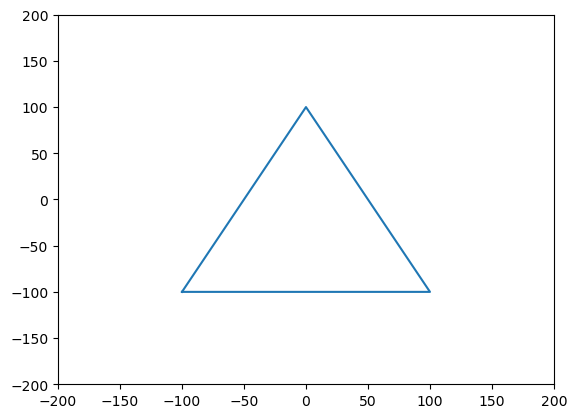

In [33]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


array([[150., 180.,   1.],
       [200., 420.,   1.],
       [250., 180.,   1.],
       [150., 180.,   1.]])

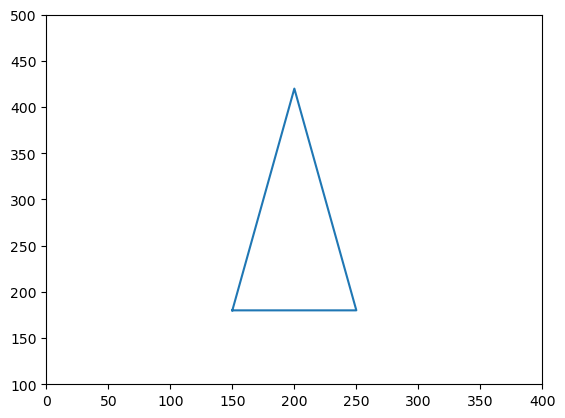

In [43]:
B1 = [[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]]
B2 = [[200, 0, 0], [0, 300, 0], [0, 0, 0], [0, 0, 0]]

B2 = [[200, 300, 0]]

B1 = np.array(B1)
B2 = np.array(B2)

A1 = A @ B1
A1 = A1 + B2


x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400])

A1

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [44]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [45]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [50]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [47]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

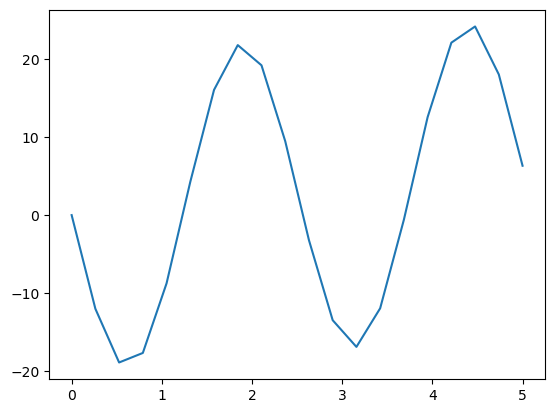

In [51]:
plt.plot(x, fx)
plt.show()

In [52]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [68]:
x0=np.array([2, 20])

res = minimize(error, x0, method='nelder-mead', options={'disp': True})

res.x

Optimization terminated successfully.
         Current function value: 0.000254
         Iterations: 55
         Function evaluations: 105


array([ 3.00000082, 21.37610394])

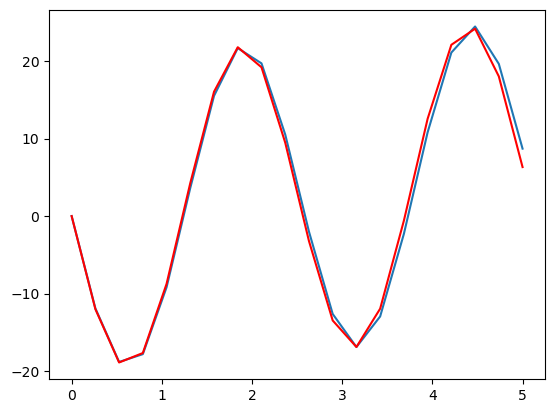

In [58]:
plt.plot(x, f(x, res.x[0], 21.4)) 
plt.plot(x, fx, c='red') 
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [70]:
import numpy as np


raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [99]:

res = []

for r in raitings:
        l = list(map(lambda x: np.dot(r,x)/(np.linalg.norm(r)*np.linalg.norm(x)),  raitings))
        res.append(l)

print('x\ty\n')
for r in range(10):
    l = list(res[r])
    l.sort()
    print('%s\t%s' % (r+1, res[r].index(l[-2]) + 1))

x	y

1	9
2	5
3	10
4	10
5	9
6	10
7	4
8	6
9	1
10	3
